# クラスタリング
データセットをクラスタと呼ばれるグループに分割する。

## k-means法
ある領域を代表するクラスタ重心を見つける。

In [149]:
import numpy as np
import pandas as pd
import sklearn

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [150]:
def my_mesh(model, X, y):
    x_min, x_max = X[:, 0].min()-1, X[:,0].max()+1
    y_min, y_max = X[:, 1].min()-1, X[:,1].max()+1

    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.05), np.arange(y_min, y_max, 0.05))

    result_all_mesh=model.predict(np.array([xx.reshape(-1), yy.reshape(-1)]).T)
    result_all_mesh=result_all_mesh.reshape(xx.shape)

    plt.pcolormesh(xx, yy, result_all_mesh, cmap=plt.cm.Accent)
    plt.scatter(X[:,0], X[:, 1], c=y, edgecolors='K', cmap=plt.cm.Accent)
    plt.show()


In [151]:
def my_scatter(df_X, target, name1, name2):    
    plt.xlabel(name1)
    plt.ylabel(name2)
    plt.scatter(df_X[name1], df_X[name2], c=target, cmap=plt.cm.Vega10)

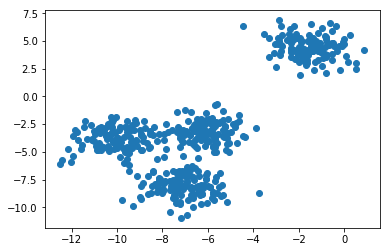

In [152]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
# 合成2次元データを作成
X, y = make_blobs(n_samples=500, centers=4, random_state=1)

plt.scatter(X[:,0], X[:,1])



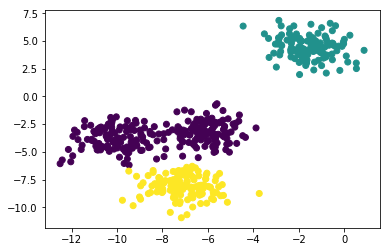

In [153]:
# クラスタリングモデルを作る
model = KMeans(n_clusters=3)
model.fit(X)

y = model.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y)



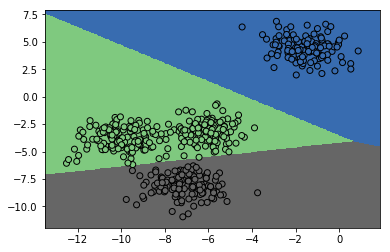

In [154]:
my_mesh(model,X,y)

# 凝集型クラスタリング
各々のデータポイントをそれぞれ個別のクラスタと
して開始し、最も類似した2つのクラスタを併合していく。これを何らかの終了条件が満たされるま
で繰り返す

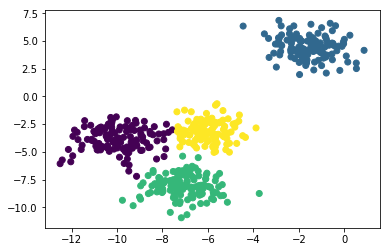

In [164]:
from sklearn.cluster import AgglomerativeClustering

model = AgglomerativeClustering(n_clusters=4)
y = model.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y)


## DBSCAN

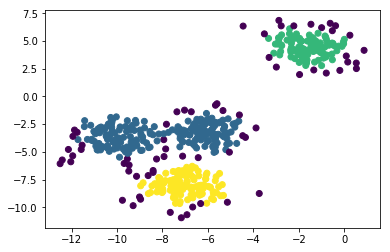

In [159]:
from sklearn.cluster import DBSCAN

model = DBSCAN()
model.fit(X)

y = model.fit_predict(X)

plt.scatter(X[:,0], X[:,1], c=y)

